In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as axis
import seaborn as sns
import json
import datetime
import matplotlib.dates as mdates

In [4]:
#Load json data files 
udc_path = 'ultimate_data_challenge.json'
login_path = 'logins.json'

openfile=open(udc_path)
jsondata=json.load(openfile)
udc_data=pd.DataFrame(jsondata)
openfile.close()

openfile=open(login_path)
jsondata=json.load(openfile)
login_data=pd.DataFrame(jsondata)
openfile.close()


# Part 1 Exploratory Data Analysis - Login Time Series

In [5]:
login_data['one'] = 1
login_data.head()

,login_time,one
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [6]:
login_data.login_time = pd.to_datetime(login_data.login_time, yearfirst = True)

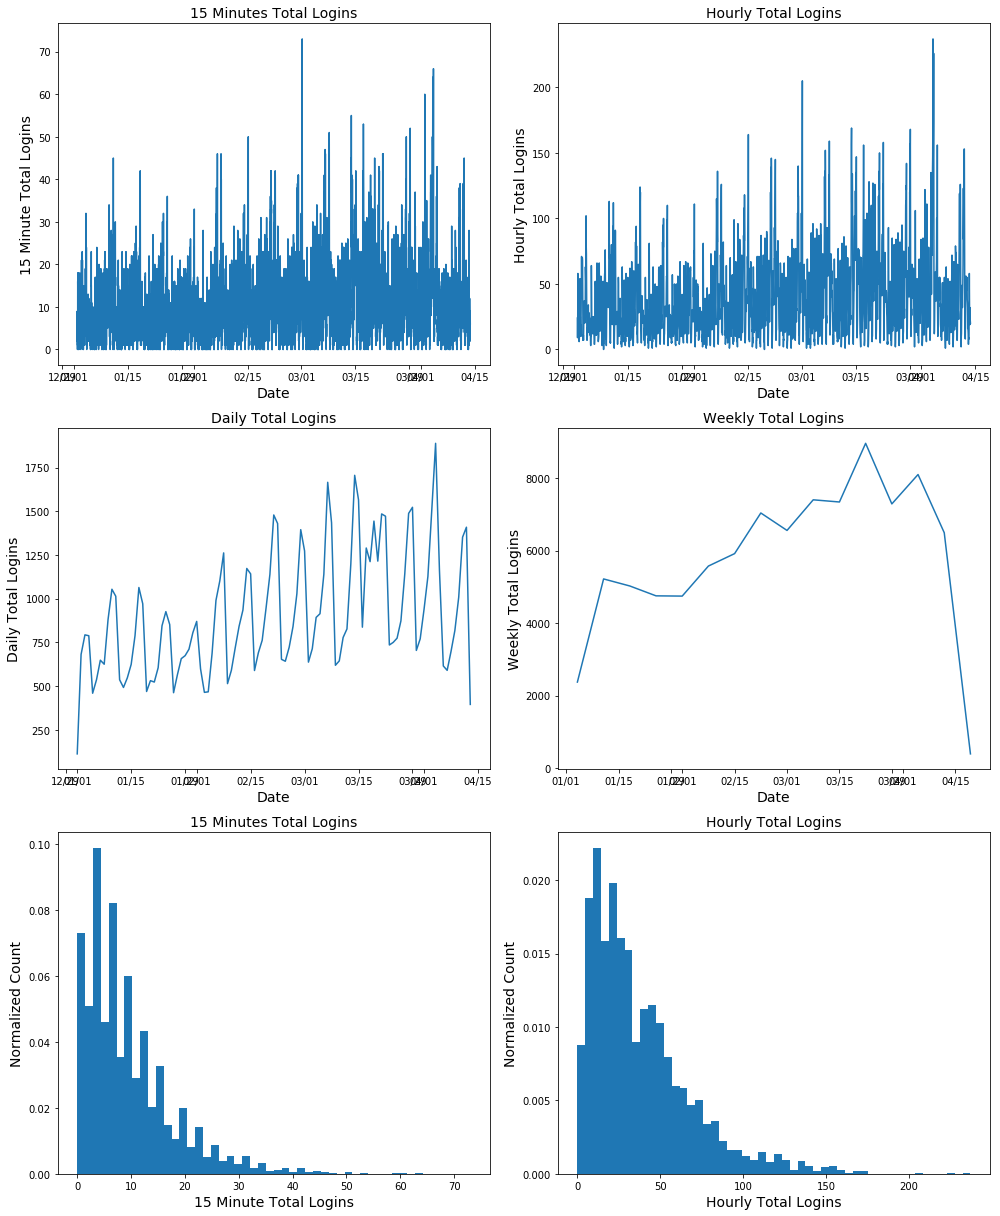

In [25]:
#Visualize 15minute interval, hourly, daily and weekly 

#15 minute interval
min_sum = login_data.resample('15Min', on = 'login_time').sum()

#Daily sum
daily_sum = login_data.resample('D', on = 'login_time').sum()

#Hourly sum
hour_sum = login_data.resample('H', on = 'login_time').sum()

#Weekly sum
week_sum = login_data.resample('W', on = 'login_time').sum()

myfmt = mdates.DateFormatter('%m/%d')

plt.figure(figsize=(14,17))
#Plot time period sums and averages 
ax = plt.subplot(321); plt.plot(min_sum.index, min_sum)
plt.ylabel('15 Minute Total Logins', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.title('15 Minutes Total Logins', fontsize = 14)
ax.xaxis.set_major_formatter(myfmt)

ax = plt.subplot(322); plt.plot(hour_sum.index, hour_sum)
plt.ylabel('Hourly Total Logins', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.title('Hourly Total Logins', fontsize = 14)
ax.xaxis.set_major_formatter(myfmt)

ax = plt.subplot(323); plt.plot(daily_sum.index, daily_sum)
plt.ylabel('Daily Total Logins', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.title('Daily Total Logins', fontsize = 14)
ax.xaxis.set_major_formatter(myfmt)

ax = plt.subplot(324); plt.plot(week_sum.index, week_sum)
plt.ylabel('Weekly Total Logins', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.title('Weekly Total Logins', fontsize = 14)
ax.xaxis.set_major_formatter(myfmt)

plt.subplot(325); plt.hist(min_sum.values, density = True, bins = 50)
plt.xlabel('15 Minute Total Logins', fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.title('15 Minutes Total Logins', fontsize = 14)


plt.subplot(326); plt.hist(hour_sum.values, density = True, bins = 50)
plt.xlabel('Hourly Total Logins', fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.title('Hourly Total Logins', fontsize = 14)

plt.tight_layout()
plt.savefig('./Figures/TimeIntervalAnalysis.png', bbox_inches = 'tight')
plt.show()

In [17]:
#look at the day of the week effects on login total.  The first day in the data set is January 1, 1970
#which was a Thursday.
day_hist = pd.DataFrame(columns = ['Weekday', 'Total_Logins'])
day_hist['Weekday'] = pd.Series(['Monday', 'Tuesday', 'Wednesday',\
                                 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_hist.Total_Logins = 0
day_new = daily_sum
day_new['Weekday'] = 0

for indx in range(len(daily_sum)):
    day_hist.Total_Logins[daily_sum.index[indx].weekday()] += daily_sum.one[indx]
    day_new.Weekday[indx] = day_new.index[indx].weekday()
        
#Find the times of day that the taxis are most active
def hr_func(ts):
    return ts.hour

temp = hour_sum.reset_index(drop=False)
temp['hour'] = temp.login_time.apply(hr_func)
temp = temp.groupby('hour').sum()

C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


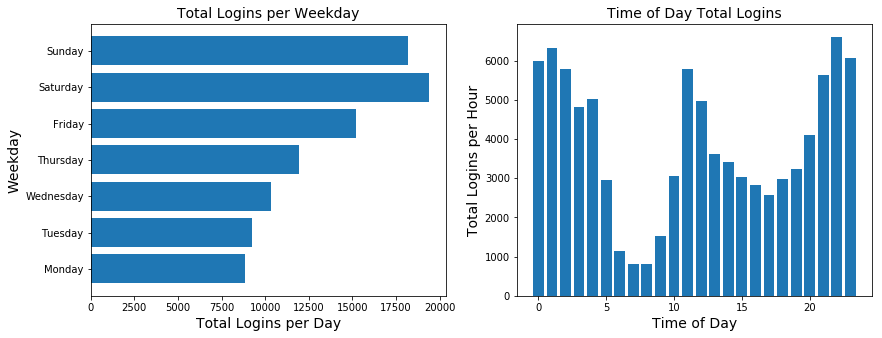

In [26]:
plt.figure(figsize = (14, 5))
#Plot daily logins
plt.subplot(121); plt.barh(day_hist.Weekday, day_hist.Total_Logins)
plt.xlabel('Total Logins per Day', fontsize = 14)
plt.ylabel('Weekday', fontsize = 14)
plt.title('Total Logins per Weekday', fontsize = 14)

#Plot hourly logins
plt.subplot(122); plt.bar(temp.index, temp.one)
plt.xlabel('Time of Day', fontsize = 14)
plt.ylabel('Total Logins per Hour', fontsize = 14)
plt.title('Time of Day Total Logins', fontsize = 14)
plt.savefig('./Figures/TimeSeriesDaily.png', bbox_inches = 'tight')
plt.show()


In [19]:
#Hours per time of day
dh_hist = pd.DataFrame(data = np.zeros((24,7)), columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',\
                                  'Friday', 'Saturday', 'Sunday'])

Weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',\
                                  'Friday', 'Saturday', 'Sunday']

for indx in range(0,len(daily_sum)-2):
    temp1 = daily_sum.index[indx+1].weekday()
    dh_hist[Weekdays[temp1]] += hour_sum.one.iloc[indx*24+4:(indx+1)*24+4].values


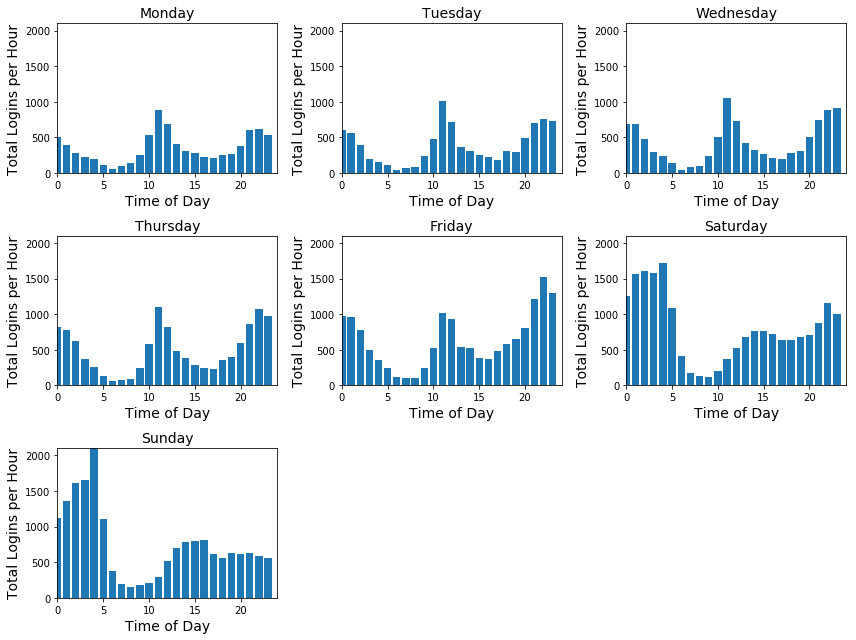

In [27]:
#Plot histograms of daily hourly logins

plt.figure(figsize = (12,9))
def plt_hist(Weekday, indx):   
    sub_num = 331+indx
    plt.subplot(sub_num); plt.bar(temp.index, dh_hist[Weekday])
    plt.xlabel('Time of Day', fontsize = 14)
    plt.ylabel('Total Logins per Hour', fontsize = 14)
    plt.title(Weekday, fontsize = 14)
    plt.axis([0, 24, 0, 2100])

for indx in range(len(Weekdays)):
    plt_hist(Weekdays[indx], indx)

plt.tight_layout() 
plt.savefig('./Figures/TimeIntervalWeekdays.png', bbox_inches = 'tight')
plt.show()

# Part 3 Predictive Modeling


In [28]:
#Look at first rows of dataset
udc_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [29]:
#Convert string dates to datetime objects
udc_data.last_trip_date = pd.to_datetime(udc_data.last_trip_date, yearfirst = True)
udc_data.signup_date = pd.to_datetime(udc_data.signup_date, yearfirst = True)

In [30]:
#Explore gaps in data and incorrect data
udc_data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [31]:
#Place zero for null values in avg_rating_of_driver and eliminate nan values
udc_data.avg_rating_of_driver[udc_data.avg_rating_of_driver.isna()] = 0
udc_data_clean = udc_data.dropna(how = 'any', axis = 0)
udc_data_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49406 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      49406 non-null float64
avg_surge                 49406 non-null float64
city                      49406 non-null object
last_trip_date            49406 non-null datetime64[ns]
phone                     49406 non-null object
signup_date               49406 non-null datetime64[ns]
surge_pct                 49406 non-null float64
trips_in_first_30_days    49406 non-null int64
ultimate_black_user       49406 non-null bool
weekday_pct               49406 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
#Explore statistics of data
udc_data_clean.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000
mean,5.783987,4.777861,3.860225,1.074617,8.846788,2.284176,60.913282
std,5.627329,0.447114,1.783484,0.221009,19.890166,3.799164,37.023166
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.000000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


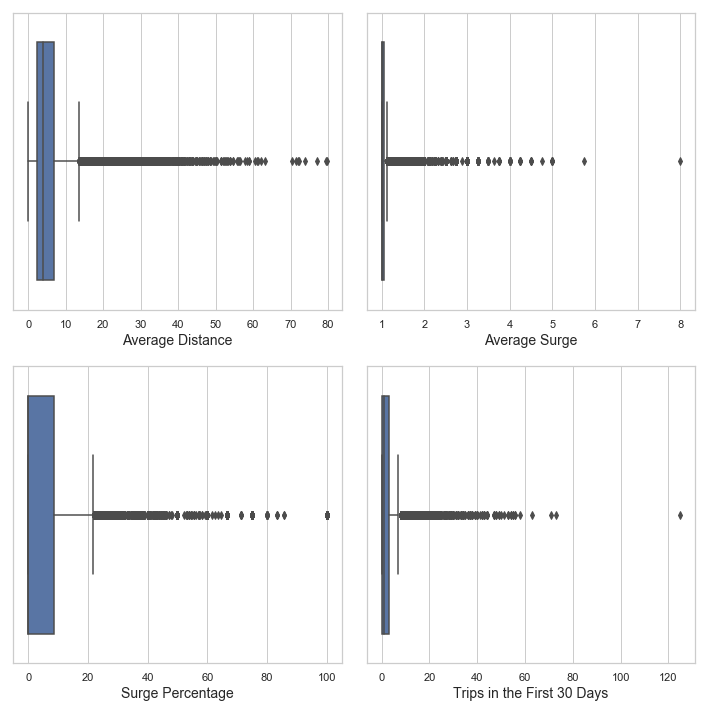

In [36]:
#Create box plots and look at ourlier data 
def box_sns(data, feature):
    sns.set(style='whitegrid')
    ax = sns.boxplot(x = data[feature])

plt.figure(figsize=(10,10))
#Look at average distance 
plt.subplot(221); box_sns(udc_data_clean, 'avg_dist')
plt.xlabel('Average Distance', fontsize = 14)
#Average surge
plt.subplot(222); box_sns(udc_data_clean, 'avg_surge')
plt.xlabel('Average Surge', fontsize = 14)
#Surge percentage
plt.subplot(223); box_sns(udc_data_clean, 'surge_pct')
plt.xlabel('Surge Percentage', fontsize = 14)
#Tripes in first 30 days
plt.subplot(224); box_sns(udc_data_clean, 'trips_in_first_30_days')
plt.xlabel('Trips in the First 30 Days', fontsize = 14)

plt.tight_layout()
plt.savefig('./Figures/BoxPlots.png', bbox_inches = 'tight')
plt.show()

In [37]:
#Calculate the number of days since the last trip taken from the last time 
#point in the data set.  This indicates if the user was active or not
max_trip = max(udc_data.last_trip_date)
days_since_last_trip = (max_trip-udc_data_clean.last_trip_date)
days_since_last_trip.head(10)

0    14 days
1    57 days
2   175 days
3     2 days
4   108 days
5    25 days
6   157 days
7   153 days
8   150 days
9   177 days
Name: last_trip_date, dtype: timedelta64[ns]

In [38]:
#Convert days since last trip to integer and add as additional feature in 
#dataset
days_since_last_trip = days_since_last_trip.dt.days
udc_data_clean['days_since_last_trip'] = days_since_last_trip

C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [39]:
#Find the fraction of users that were retained in clean set and in original
#data set
max_trip = max(udc_data.last_trip_date)
days_since_last_trip_org = (max_trip-udc_data.last_trip_date)
days_since_last_trip_org = days_since_last_trip_org.dt.days

frac_org = len(days_since_last_trip_org[days_since_last_trip_org <= 30])/\
               len(days_since_last_trip_org) 
    
frac_clean = len(days_since_last_trip[days_since_last_trip <= 30])/\
               len(days_since_last_trip) 
    
print('Fraction of users retain, original dataset : %.3f'%(frac_org))    
print('Fraction of users retain, clean dataset : %.3f'%(frac_clean))    

Fraction of users retain, original dataset : 0.376
Fraction of users retain, clean dataset : 0.377


In [56]:
#Create additional features and replace text features with numerical values

#Define numerical values for each city in the dataset 
city_names = udc_data_clean.city.unique()
city_dict = {}
for indx in range(len(city_names)):
    city_dict[city_names[indx]] = indx

udc_data_clean['city_num'] = [city_dict[name] for name in udc_data_clean['city']]

#Define numerical values for each phone in the dataset
phone_names = udc_data_clean.phone.unique()
phone_dict = {}
for indx in range(len(phone_names)):
    phone_dict[phone_names[indx]] = indx

udc_data_clean['phone_num'] = [phone_dict[name] for name in udc_data_clean['phone']]

udc_data_clean.ultimate_black_user = udc_data_clean.ultimate_black_user.astype('int')

C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jjjon\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [41]:
#Create predictive modeling using features present and the data about whether 
#the user is active or not.  Define target using the definition of active.
y = days_since_last_trip <= 30
y = y.astype('int')

#Drop unnecessary features from feature modeling set
X = udc_data_clean.drop(['last_trip_date', 'signup_date', 'city',
                         'phone', 'days_since_last_trip'], axis = 1)

In [42]:
#Split the data into a training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
       train_test_split(X, y, test_size = 0.3, random_state = 42)

In [43]:
#Chose predictive model from several choices.  Classification algorithm
#therefore several choice could be chosen.  Look at top types of classification
#algorithms.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_rf = {'n_estimators': [20, 40, 80, 160],
            'max_depth': [4, 6, 8],
             'n_jobs':[4]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_rf, cv = 5, refit = True)
rf_cv.fit(X_train, y_train)

from xgboost import XGBClassifier
param_gb = {'booster': ['gbtree'],
          'learning_rate': [0.01, 0.1, 0.3],
          'max_depth': [4, 6, 8],
           'n_estimators': [50, 100, 200],
          'n_jobs': [4]}

gb = XGBClassifier()
gb_cv = GridSearchCV(gb, param_gb, cv = 5, refit = True)
gb_cv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'booster': ['gbtree'], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [4, 6, 8], 'n_estimators': [50, 100, 200], 'n_jobs': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
#Determine best fit parameters and run models new parameters
print('Random Forest best score : %.3f'%(rf_cv.best_score_))
print('Random Forest best params : ', rf_cv.best_params_)

print('XGBoost best score : %.3f'%(gb_cv.best_score_))
print('XGBoost best params : ', gb_cv.best_params_)

Random Forest best score : 0.780
Random Forest best params :  {'max_depth': 8, 'n_estimators': 160, 'n_jobs': 4}
XGBoost best score : 0.789
XGBoost best params :  {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': 4}


In [45]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#Check is weight average ensemble model would provide better scoring 
#rf_param_best = rf_cv.best_params_
#gb_param_best = rf_cv.best_params_
rf_param_best = {'max_depth': 8, 'n_estimators': 160, 'n_jobs': 4}
gb_param_best = {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6,\
                 'n_estimators': 200, 'n_jobs': 4}
rf = RandomForestClassifier(**rf_param_best)
gb = XGBClassifier(**gb_param_best)

rf_model = rf.fit(X_train, y_train)
gb_model = gb.fit(X_train, y_train)

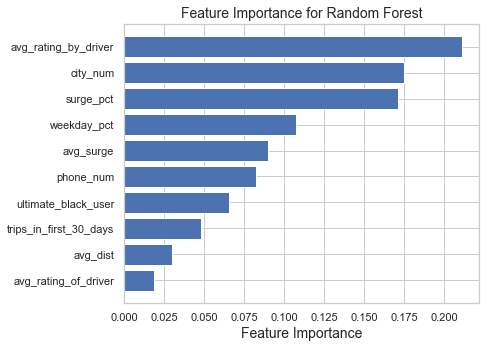

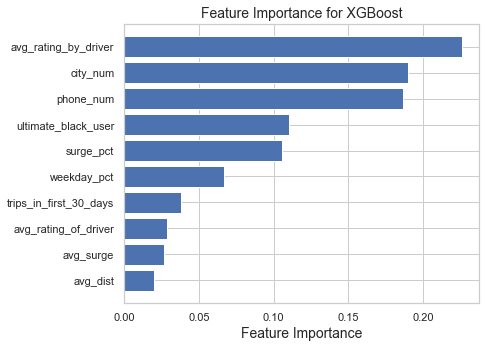

In [48]:
#Display feature importance
def feature_imp_plot(model_name, model, X_train):
    features = X_train.columns
    feat_imp = model.feature_importances_
    feat = pd.DataFrame()
    feat['feature'] = features
    feat['importance'] = feat_imp
    feat = feat.sort_values('importance')

    wide = np.arange(len(feat_imp))
    plt.figure(figsize = (7,5))
    plt.barh(wide, feat['importance'])
    plt.yticks(wide, feat['feature'])
    plt.xlabel('Feature Importance', fontsize = 14)
    plt.title('Feature Importance for '+model_name, fontsize = 14)
    plt.tight_layout()
    plt.savefig('FeatureImportance_embed_av.png', bbox = 'tight')
    plt.savefig('./Figures/FeatImp_'+model_name+'.png', bbox_inches = 'tight')
    plt.show()
    
feature_imp_plot('Random Forest', rf, X_train)
feature_imp_plot('XGBoost', gb, X_train)

In [49]:
from sklearn.metrics import accuracy_score
#Look at the result of create model ensemble on accuracy
rf_prob = rf.predict_proba(X_test)
gb_prob = gb.predict_proba(X_test)

ensemble_vec = np.empty([100])

for indx in range(100):
    ensemble_prob = (rf_prob[:,1]*indx + gb_prob[:,1]*(100-indx))/100
    ensemble_y = [round(value) for value in ensemble_prob]
    ensemble_accuracy = accuracy_score(y_test, ensemble_y)
    ensemble_vec[indx] = ensemble_accuracy 
    
rf_y = [round(value[1]) for value in rf_prob]
gb_y = [round(value[1]) for value in gb_prob]

#Find the maximum accuracy for ensemble weights
ensemble_accuracy_max = max(ensemble_vec)
ensemble_indx = np.argmax(ensemble_vec)
rf_accuracy = accuracy_score(y_test, rf_y)
gb_accuracy = accuracy_score(y_test, gb_y)

print('Random Forest Accuracy %.3f'%(rf_accuracy))
print('XGBoost Accuracy %.3f'%(gb_accuracy))
print('\nEnsemble Wts : {}rf_model + {}gb_model'.format(ensemble_indx, 100-ensemble_indx))
print('Ensemble Accuracy %.3f'%(ensemble_accuracy_max))


Random Forest Accuracy 0.787
XGBoost Accuracy 0.795

Ensemble Wts : 44rf_model + 56gb_model
Ensemble Accuracy 0.795


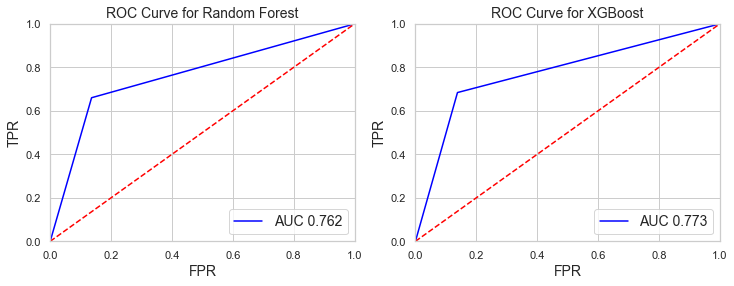

In [52]:
#Calculate ROC and AUC values for each model
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc(model_name, pred):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    plt.plot(fpr, tpr, color = 'blue')
    plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
    plt.xlabel('FPR', fontsize = 14)
    plt.ylabel('TPR', fontsize = 14)
    plt.title('ROC Curve for '+model_name, fontsize = 14)
    plt.axis([0, 1, 0, 1])
    plt.legend(['AUC %.3f'%auc], loc = 'lower right', fontsize = 14)

plt.figure(figsize=(12,4))
plt.subplot(121); plot_roc('Random Forest', rf_y)
plt.subplot(122); plot_roc('XGBoost', gb_y)
plt.savefig('./Figures/ROC_rf_gb.png', bbox_inches = 'tight')
plt.show()

In [51]:
#Look at the retention rate based on the phone the user obtains
city_hist = pd.DataFrame(np.zeros((3,3)),columns = ['City', 'Count', 'Total'])
city_hist['City'] = pd.Series(list(city_dict.keys()))
city_hist = city_hist.set_index('City')

rating_hist = pd.DataFrame(np.zeros((6,3)),columns = ['Rating', 'Count', 'Total'])
rating_hist['Rating'] = pd.Series(['0','1', '2', '3', '4', '5'])
rating_hist = rating_hist.set_index('Rating')

rating_by_hist = pd.DataFrame(np.zeros((5,3)),columns = ['Rating', 'Count', 'Total'])
rating_by_hist['Rating'] = pd.Series(['1', '2', '3', '4', '5'])
rating_by_hist = rating_by_hist.set_index('Rating')

phone_hist = pd.DataFrame(np.zeros((2,3)),columns = ['Phone', 'Count', 'Total'])
phone_hist['Phone'] = list(phone_dict.keys())
phone_hist = phone_hist.set_index('Phone')

black_hist = pd.DataFrame(np.zeros((2,3)),columns = ['User', 'Count', 'Total'])
black_hist['User'] = list(['Not UB User', 'UB User'])
black_hist = black_hist.set_index('User')

surge_perc_hist = pd.DataFrame(np.zeros((11,3)),columns = ['Surge', 'Count', 'Total'])
surge_perc_hist['Surge'] = pd.Series(list(range(11)))*10
surge_perc_hist.Surge = surge_perc_hist.Surge.astype('str')
surge_perc_hist = surge_perc_hist.set_index('Surge')

for indx in range(len(y)):
    city_hist.Count.loc[udc_data_clean.city.iloc[indx]] += y.iloc[indx]
    city_hist.Total.loc[udc_data_clean.city.iloc[indx]] += 1
    
    rating_hist.Count.loc[str(int(round(udc_data_clean.avg_rating_of_driver.iloc[indx])))] += y.iloc[indx]
    rating_hist.Total.loc[str(int(round(udc_data_clean.avg_rating_of_driver.iloc[indx])))] += 1

    rating_by_hist.Count.loc[str(int(round(udc_data_clean.avg_rating_by_driver.iloc[indx])))] += y.iloc[indx]
    rating_by_hist.Total.loc[str(int(round(udc_data_clean.avg_rating_by_driver.iloc[indx])))] += 1
    
    phone_hist.Count.loc[udc_data_clean.phone.iloc[indx]] += y.iloc[indx]
    phone_hist.Total.loc[udc_data_clean.phone.iloc[indx]] += 1
    
    black_hist.Count.iloc[udc_data_clean.ultimate_black_user.iloc[indx]] += y.iloc[indx]
    black_hist.Total.iloc[udc_data_clean.ultimate_black_user.iloc[indx]] += 1   

    temp = int(round(udc_data_clean.surge_pct.iloc[indx]/10))
    surge_perc_hist.Count.iloc[temp] += y.iloc[indx]
    surge_perc_hist.Total.iloc[temp] += 1

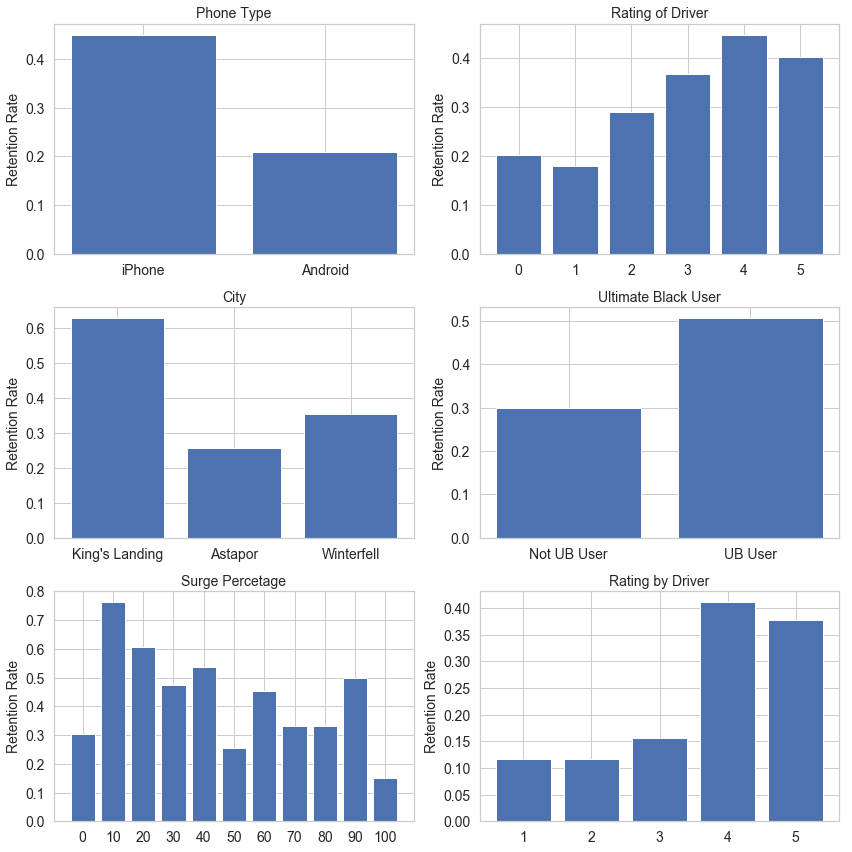

In [53]:
#Calculate the retention rate fraction then plot on histogram
frac_city = city_hist.Count/city_hist.Total
frac_rating = rating_hist.Count/rating_hist.Total
frac_phone = phone_hist.Count/phone_hist.Total
frac_black = black_hist.Count/black_hist.Total
frac_by_rating = rating_by_hist.Count/rating_by_hist.Total
frac_surge = surge_perc_hist.Count/surge_perc_hist.Total

plt.figure(figsize=(12,12))

plt.subplot(321); plt.bar(frac_phone.index, frac_phone)
plt.title('Phone Type', fontsize = 14)
plt.ylabel('Retention Rate', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(322); plt.bar(frac_rating.index, frac_rating)
plt.title('Rating of Driver', fontsize = 14)
plt.ylabel('Retention Rate', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(323); plt.bar(frac_city.index, frac_city)
plt.title('City', fontsize = 14)
plt.ylabel('Retention Rate', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(324); plt.bar(frac_black.index, frac_black)
plt.title('Ultimate Black User', fontsize = 14)
plt.ylabel('Retention Rate', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(325); plt.bar(frac_surge.index, frac_surge)
plt.title('Surge Percetage', fontsize = 14)
plt.ylabel('Retention Rate', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(326); plt.bar(frac_by_rating.index, frac_by_rating)
plt.title('Rating by Driver', fontsize = 14)
plt.ylabel('Retention Rate', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.tight_layout()
plt.savefig('./Figures/FeatureRenentionRate.png', bbox_inches = 'tight')
plt.show()

In [54]:
#Compare rate of retention for those who scored their driver versus the NaN values which most 
#likely are explained by people not rating their driver
udc_data['days_since_last_trip'] = days_since_last_trip_org

yes_score = udc_data[udc_data.avg_rating_of_driver > 0.0]
no_score = udc_data[udc_data.avg_rating_of_driver == 0]

yes_frac = (yes_score.days_since_last_trip <= 30).sum()/len(yes_score.days_since_last_trip)
no_frac = (no_score.days_since_last_trip <= 30).sum()/len(no_score.days_since_last_trip)

print('Rentention rate for those who rate their driver was %.3f'%(yes_frac))
print('Rentention rate for those who did not rate their driver was %.3f'%(no_frac))

Rentention rate for those who rate their driver was 0.410
Rentention rate for those who did not rate their driver was 0.201


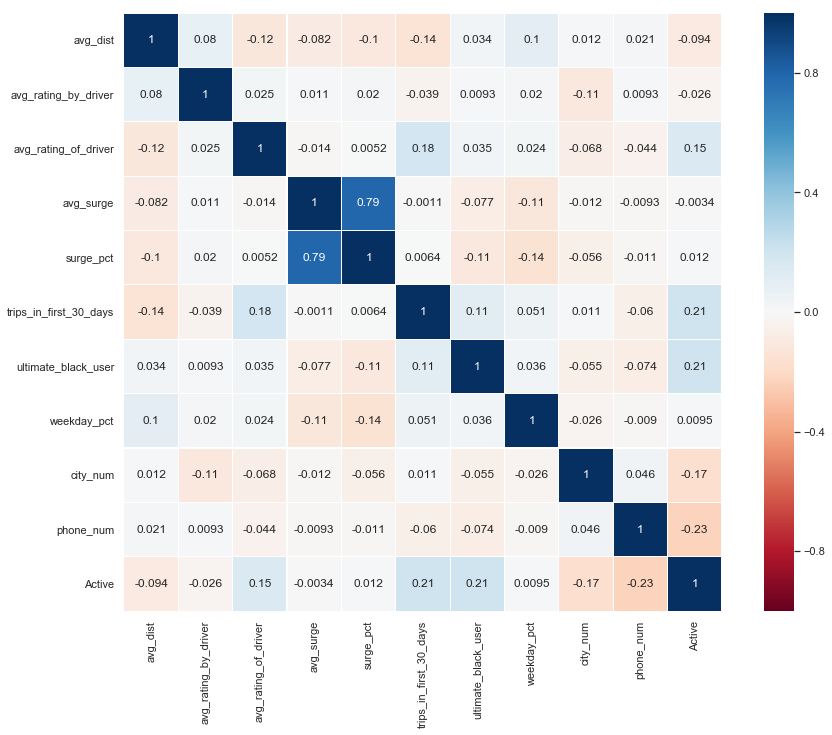

In [55]:
#Double check the correlation matrix between different features used in modeling
X2 = X
X2['Active'] = y

colormap = plt.cm.RdBu
plt.figure(figsize=(15,11))
sns.heatmap(X2.astype(float).corr(), linewidths = 0.1,\
           vmax = 1.0, vmin = -1, square = True, cmap = colormap, \
           linecolor = 'white', annot = True)
plt.savefig('./Figures/CorrelationMatrix.png', bbox_inches = 'tight')
plt.show()

In [ ]:
#Delete all global variables
for i in list(globals().keys()):
    if(i[0] != '_'):
        exec('del {}'.format(i))